<a href="https://colab.research.google.com/github/nmeena2/astro_assignments/blob/main/Astro_414_Lab_2_Tabby_Star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tabby Star Example

In [1]:
!pip install lightkurve --upgrade
from lightkurve import search_targetpixelfile

pixelfile = search_targetpixelfile("KIC 8462852", quarter = 16).download()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 40.6 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=7a1685647d8fe0e2ee1552896cdb73025d6687b639f82c38260788995b7979f5
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50451 sha256=f558e66842d9d2c638f36d50061be6ff25ecae74175c5306571e56a32c3ec400
  Stored in directory: /root/.cache/pip/wheels/3e/b8/c5/b553

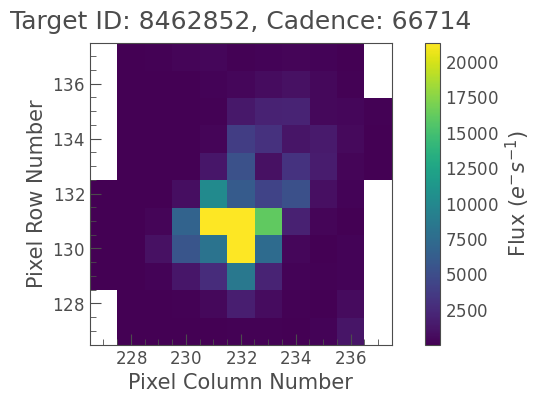

In [ ]:
pixelfile.plot(frame = 1)

In [ ]:
lc = pixelfile.to_lightcurve(aperture_mask='all')

In [ ]:
lc.time

<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.91762194 1557.9380561
 1557.95849016]>

In [ ]:
lc.flux

<Quantity [258645.03, 258660.05, 258690.08, ..., 258948.84, 258884.66,
           258865.6 ] electron / s>

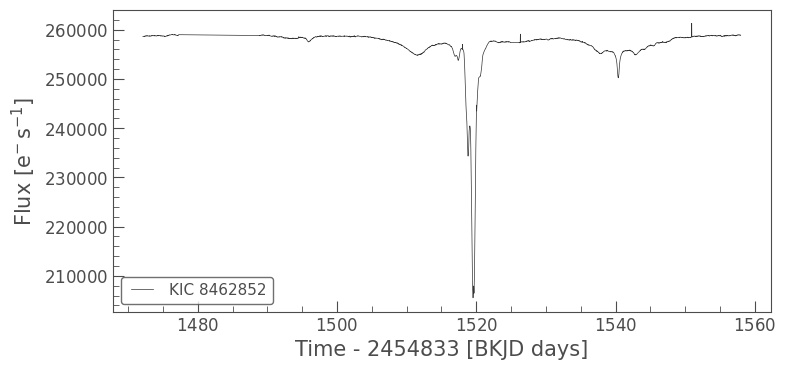

In [ ]:
lc.plot()

In [ ]:
!pip install tess-point --upgrade

  Created wheel for tess-point: filename=tess_point-0.6.1-cp37-none-any.whl size=22449 sha256=8d7c34f6011777993ab6b2916989f049b049395e320f5de961f7c1abc2a2e4b1
  Stored in directory: /root/.cache/pip/wheels/01/63/f8/bbeb07cdacfb4d7e03289b31f9b6d3c5f58c6bedbc2703ca65
Successfully built tess-point


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astroquery.mast import Tesscut
from glob import glob
import lightkurve as lk
from astroquery.ned import Ned
from tess_stars2px import tess_stars2px_function_entry

In [ ]:
c = SkyCoord('05 22 57.9 -36 27 31', unit = (u.hourangle, u.deg))

ra, dec = c.ra.degree, c.dec.degree
outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, \
 outColPix, outRowPix, scinfo = tess_stars2px_function_entry(
 9999, ra, dec)
for i in range(len(outID)):
 print('{0:d} {1:d} {2:d} {3:d} {4:f} {5:f}'.format(outID[i], outSec[i], \
 outCam[i], outCcd[i], outColPix[i], outRowPix[i]))

9999 5 3 1 1329.780941 1027.117097
9999 6 3 2 1530.154966 1165.656670
9999 32 3 1 1797.770892 979.226364


In [ ]:
sec_use = outSec[0]
cutout_size = [51, 51]
force_download = False
rastr, decstr = str("{0:.6f}".format(ra)), str("{0:.6f}".format(dec))
coord_str = rastr + '_' + decstr
fn = np.sort(glob('./*' + coord_str + '*.fits'))
if fn.shape[0] == 0 or force_download is True:
    coord = SkyCoord(ra, dec, unit="deg")
    manifest = Tesscut.download_cutouts(coordinates=coord, size=cutout_size, sector=sec_use)
fn = np.sort(glob('./*' + coord_str + '*.fits'))

Inflating...


In [ ]:
fn

array(['./tess-s0005-3-1_80.741250_-36.458611_51x51_astrocut.fits'],
      dtype='<U57')

In [ ]:
tpf = lk.read(fn[0])
ind_good = np.where(tpf.quality == 0)
tpf.shape

(1188, 51, 51)

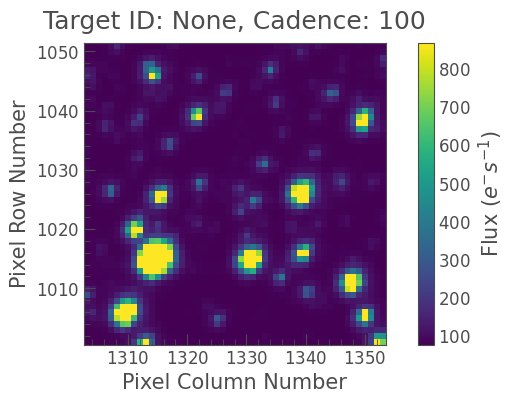

In [ ]:
tpf.plot(frame=100)

In [ ]:
postage_stamp_mask = tpf.hdu[2].data < 0
postage_stamp_mask.sum()
targ_aper = postage_stamp_mask.copy()
bkg1_aper = postage_stamp_mask.copy()
star_aper = postage_stamp_mask.copy()
targ_aper[:,:] = False
star_aper[:,:] = False
bkg1_aper[:,:] = False
#define apertures for different stars
#star2_aper = star_aper.copy()
#star3_aper = star_aper.copy()
#star4_aper = star_aper.copy()
# This is a different way to get the background pixels
#iframe = 100
#bkg_aper = postage_stamp_mask.copy()
#bkg_aper[:,:] = False
#flux_sort = np.sort(tpf.flux[iframe,:,:],axis=None)
#flux_thre = flux_sort[int(0.4*tpf.flux.shape[0])] # default is the lowest 40% pixels
#ind = np.where(tpf.flux[iframe,:,:] < flux_thre)
#bkg_aper[ind] = True
targ_aper[25:28, 25:28] = True
star_aper[23:29, 34:40] = True # star to the immediate right
bkg1_aper[15:18,20:23] = True
N_targ_pix, N_star_pix, N_bkg1_pix = targ_aper.sum(), star_aper.sum(), bkg1_aper.sum()
N_targ_pix, N_star_pix, N_bkg1_pix

(9, 36, 9)

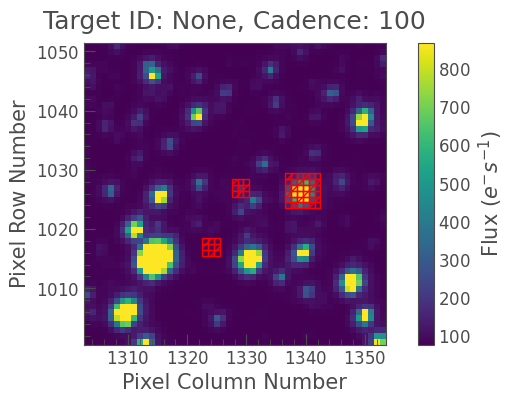

In [ ]:
tpf.plot(frame=100,aperture_mask=targ_aper + star_aper + bkg1_aper)
#tpf.plot(frame=100,aperture_mask=star_aper)
#tpf.plot(frame=100,aperture_mask=bkg1_aper)

In [ ]:
# estimate the background flux per pixel
lc_bkg = tpf.to_lightcurve(aperture_mask=bkg1_aper) / N_bkg1_pix
lc_targ = tpf.to_lightcurve(aperture_mask=targ_aper) - lc_bkg.flux * N_targ_pix
lc_star = tpf.to_lightcurve(aperture_mask=star_aper) - lc_bkg.flux * N_star_pix

In [ ]:
# check if the fluxes for the target make sense
lc_targ.flux

<Quantity [450.24426, 450.365  , 453.30798, ..., 432.48926, 414.47852,
           420.64062] electron / s>

Text(0.5, 1.0, 'PKS 0521-365 V=14.6')

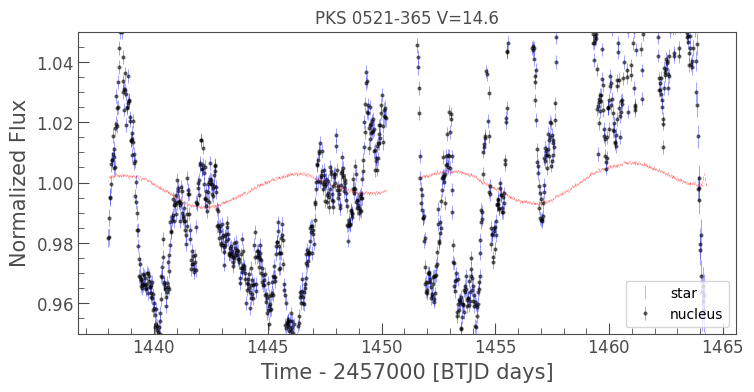

In [ ]:
ax = lc_star.normalize().errorbar(color='red', alpha=0.5, label='star')
ax = lc_targ.normalize().errorbar(ax=ax, color='b', alpha=0.5, label='nucleus',marker='o',mfc='black',mec='black',ms=2
)
plt.legend(loc='lower right')
plt.ylim(0.95,1.05)
plt.title('PKS 0521-365 V=14.6')

## Sigma Orionis

For my object, I would like to choose the
Sigma Orionis star from the Orion Constellation using Simbad because my cat's name is Orion.



In [ ]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("Sigma Orionis")
result_table.pprint(show_unit = True)

 MAIN_ID        RA           DEC      ... COO_WAVELENGTH     COO_BIBCODE    
             "h:m:s"       "d:m:s"    ...                                   
--------- ------------- ------------- ... -------------- -------------------
* sig Ori 05 38 44.7665 -02 36 00.284 ...              O 2018yCat.1345....0G


Here we see that the RA and DEC of this star are 05 38 44.7665 and -02 36 00.284 respectively.

In [ ]:
c = SkyCoord('05 38 44.7665 -02 36 00.284', unit = (u.hourangle, u.deg))

In [ ]:
ra, dec = c.ra.degree, c.dec.degree
outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, \
 outColPix, outRowPix, scinfo = tess_stars2px_function_entry(
 9999, ra, dec)
for i in range(len(outID)):
 print('{0:d} {1:d} {2:d} {3:d} {4:f} {5:f}'.format(outID[i], outSec[i], \
 outCam[i], outCcd[i], outColPix[i], outRowPix[i]))

9999 6 1 1 768.830357 687.328456
9999 32 1 2 2040.206080 613.073334


In [ ]:
sec_use = outSec[0]
cutout_size = [51, 51]
force_download = False
rastr, decstr = str("{0:.6f}".format(ra)), str("{0:.6f}".format(dec))
coord_str = rastr + '_' + decstr
fn = np.sort(glob('./*' + coord_str + '*.fits'))
if fn.shape[0] == 0 or force_download is True:
  coord = SkyCoord(ra, dec, unit="deg")
  manifest = Tesscut.download_cutouts(coordinates=coord, size=cutout_size, sector=sec_use)
fn = np.sort(glob('./*' + coord_str + '*.fits'))

In [ ]:
fn

array(['./tess-s0006-1-1_84.686527_-2.600079_51x51_astrocut.fits'],
      dtype='<U56')

In [ ]:
tpf = lk.read(fn[0])
img = np.where(tpf.quality == 0)
tpf.shape

(987, 51, 51)

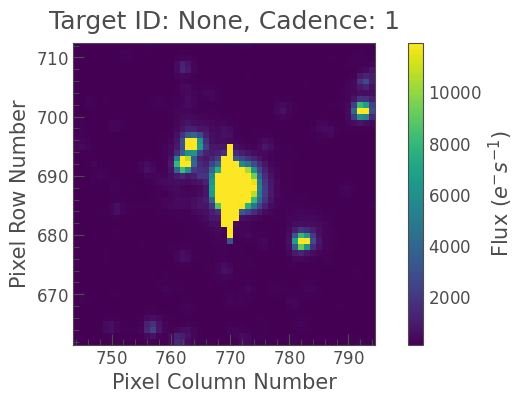

In [ ]:
tpf.plot(frame = 1)

In [ ]:
postage_stamp_mask = tpf.hdu[2].data < 0
postage_stamp_mask.sum()
targ_aper = postage_stamp_mask.copy()
bkg1_aper = postage_stamp_mask.copy()
star_aper = postage_stamp_mask.copy()
targ_aper[:,:] = False
star_aper[:,:] = False
bkg1_aper[:,:] = False
# you can define apertures for different stars
#star2_aper = star_aper.copy()
#star3_aper = star_aper.copy()
#star4_aper = star_aper.copy()
# This is a different way to get the background pixels
#iframe = 100
#bkg_aper = postage_stamp_mask.copy()
#bkg_aper[:,:] = False
#flux_sort = np.sort(tpf.flux[iframe,:,:],axis=None)
#flux_thre = flux_sort[int(0.4*tpf.flux.shape[0])] # default is the lowest 40% pixels
#ind = np.where(tpf.flux[iframe,:,:] < flux_thre)
#bkg_aper[ind] = True

targ_aper[25:28, 25:28] = True
star_aper[23:29, 34:40] = True # star to the immediate right
bkg1_aper[15:18,20:23] = True
N_targ_pix, N_star_pix, N_bkg1_pix = targ_aper.sum(), star_aper.sum(), bkg1_aper.sum()
N_targ_pix, N_star_pix, N_bkg1_pix

(9, 36, 9)

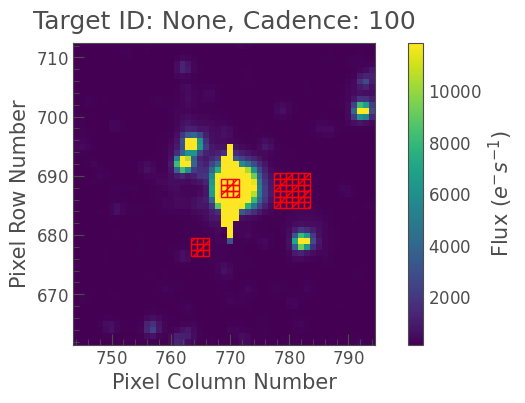

In [ ]:
tpf.plot(frame=100,aperture_mask=targ_aper + star_aper + bkg1_aper)

In [ ]:
lc_bkg = tpf.to_lightcurve(aperture_mask=bkg1_aper) / N_bkg1_pix
lc_targ = tpf.to_lightcurve(aperture_mask=targ_aper) - lc_bkg.flux * N_targ_pix
lc_star = tpf.to_lightcurve(aperture_mask=star_aper) - lc_bkg.flux * N_star_pix

In [ ]:
lc_targ.flux

<Quantity [1029129.44, 1029167.1 , 1029217.6 , 1029239.94, 1029297.3 ,
           1029369.9 , 1029309.2 , 1029220.9 , 1029197.4 , 1029209.4 ,
           1029367.  , 1029384.06, 1029331.2 , 1029359.8 , 1029322.3 ,
           1029227.25, 1029276.94, 1029231.  , 1029225.06, 1029163.44,
           1029221.9 , 1029185.1 , 1029296.  , 1029240.2 , 1029233.8 ,
           1029165.94, 1029162.44, 1029148.1 , 1029163.25, 1029087.2 ,
           1029115.44, 1029152.3 , 1029186.44, 1029159.5 , 1029138.4 ,
           1029018.  , 1029082.56, 1029008.94, 1029016.06, 1028999.3 ,
           1028986.2 , 1029002.  , 1028945.7 , 1029014.9 , 1028899.7 ,
           1028898.3 , 1028943.25, 1028821.9 , 1028816.75, 1028825.1 ,
           1028940.3 , 1028805.4 , 1028737.9 , 1028758.4 , 1028713.56,
           1028650.3 , 1028655.4 , 1028719.56, 1028603.6 , 1028535.25,
           1028440.44, 1028445.4 , 1028495.5 , 1028594.2 , 1028527.6 ,
           1028475.4 , 1028503.2 , 1028596.  , 1028624.7 , 1028574.  ,
      

Text(0.5, 1.0, 'Sigma Orionis')

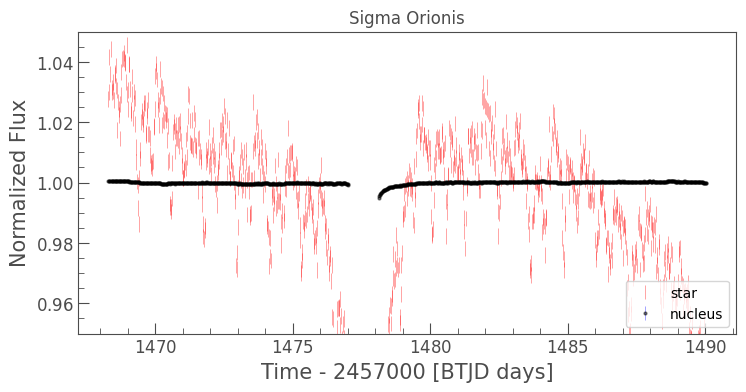

In [ ]:
ax = lc_star.normalize().errorbar(color='red', alpha=0.5, label='star')
ax = lc_targ.normalize().errorbar(ax=ax, color='b', alpha=0.5, label='nucleus',marker='o',mfc='black',mec='black',ms=2
)
plt.legend(loc='lower right')
plt.ylim(0.95,1.05)
plt.title('Sigma Orionis')

From the dip in the lightcurve, I am going to estimate the period of Sigma Orionis to be about 1.5 days.